---
<h3>Please note that this project is a part of my coursework and is still a work in progress following the course schedule.  </h3>

<h3>As of now, the project is not yet completed.  </h3>

<h3>I am actively working on further developments, improvements, and analysis based on the course requirements.</h3>


---

In [1]:
import pandas as pd
# pd.options.display.max_rows = None
pd.options.display.max_columns = None
# pd.reset_option('display.max_columns')

import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

import datetime

rs = 73

In [2]:
path = r"C:\\Users\\james\\OneDrive\\FHK\\Course Materials\\WS2324 - Energy\\1-s2.0-S0169207013000745-mmc1\\GEFCOM2012_Data\\Load\\"

# e.g.: path = "drive/MyDrive/Energy/GEFCOM2012_Load/"

holiday = pd.read_csv(path + "Holiday_List.csv")
load_ben = pd.read_csv(path + "Load_benchmark.csv")
load_his = pd.read_csv(path + "Load_history.csv")
load_sol = pd.read_csv(path + "Load_solution.csv")
temp_his = pd.read_csv(path + "temperature_history.csv")
temp_sol = pd.read_csv(path + "temperature_solution.csv")

In [3]:
# data check
holiday

,Unnamed: 0,2004,2005,2006,2007,2008
0,New Year's Day,"Thursday, January 1","Friday, December 31, 2004","Monday, January 2","Monday, January 1","Tuesday, January 1"
1,"Birthday of Martin Luther King, Jr.","Monday, January 19","Monday, January 17","Monday, January 16","Monday, January 15","Monday, January 21"
2,Washington's Birthday,"Monday, February 16","Monday, February 21","Monday, February 20","Monday, February 19","Monday, February 18"
3,Memorial Day,"Monday, May 31","Monday, May 30","Monday, May 29","Monday, May 28","Monday, May 26"
4,Independence Day,"Monday, July 5","Monday, July 4","Tuesday, July 4","Wednesday, July 4","Friday, July 4"
5,Labor Day,"Monday, September 6","Monday, September 5","Monday, September 4","Monday, September 3",NaN
6,Columbus Day,"Monday, October 11","Monday, October 10","Monday, October 9","Monday, October 8",NaN
7,Veterans Day,"Thursday, November 11","Friday, November 11","Friday, November 10","Monday, November 12",NaN
8,Thanksgiving Day,"Thursday, November 25","Thursday, November 24","Thursday, November 23","Thursday, November 22",NaN
9,Christmas Day,"Friday, December 24","Monday, December 26","Monday, December 25","Tuesday, December 25",NaN


---
# Initial Data Analysis: Load 

In [4]:
# data check
load_his.sample(5, random_state=rs)

,zone_id,year,month,day,h1,h2,h3,h4,h5,h6,h7,h8,h9,h10,h11,h12,h13,h14,h15,h16,h17,h18,h19,h20,h21,h22,h23,h24
28400,18,2004,12,16,"299,552","305,420","314,054","325,171","339,132","344,523","380,833","362,398","359,714","305,353","266,990","239,260","216,210","203,417","194,640","196,160","216,339","259,889","279,889","284,341","281,522","267,728","262,790","238,599"
11167,7,2007,6,21,"154,081","145,344","140,410","138,453","140,181","145,616","156,968","171,405","179,872","189,880","199,580","207,673","214,687","222,068","229,143","236,064","239,751","237,633","229,024","221,931","213,772","204,419","186,031","164,741"
31124,19,2007,11,25,"91,642","87,206","84,742","83,521","83,948","85,756","89,813","98,384","107,548","109,514","102,110","94,156","91,166","88,045","86,002","85,047","89,351","101,714","89,841","102,460","98,633","90,293","79,804","71,964"
11203,7,2007,7,27,"174,368","162,905","156,686","153,862","155,639","161,834","172,698","185,367","198,366","212,570","228,246","243,386","256,227","263,767","261,011","241,247","226,724","220,822","214,668","209,140","205,590","201,113","188,231","169,590"
5751,4,2006,3,12,399,365,351,346,378,402,474,559,593,598,546,519,506,464,441,440,495,535,564,609,587,518,456,396


In [5]:
def replace_str(x):
    """
        convert "string type" load data to "float type"
    """

    if type(x) == str:
        x = x.replace(",", "")
        return float(x)
    else:
        return x

# apply function to all "hour" columns
for col in load_his.columns[4:]:
    load_his.loc[:, col] = load_his.loc[:, col].map(lambda x: replace_str(x))

In [6]:
# conversion check
load_his.sample(5, random_state=rs)

,zone_id,year,month,day,h1,h2,h3,h4,h5,h6,h7,h8,h9,h10,h11,h12,h13,h14,h15,h16,h17,h18,h19,h20,h21,h22,h23,h24
28400,18,2004,12,16,299552.0,305420.0,314054.0,325171.0,339132.0,344523.0,380833.0,362398.0,359714.0,305353.0,266990.0,239260.0,216210.0,203417.0,194640.0,196160.0,216339.0,259889.0,279889.0,284341.0,281522.0,267728.0,262790.0,238599.0
11167,7,2007,6,21,154081.0,145344.0,140410.0,138453.0,140181.0,145616.0,156968.0,171405.0,179872.0,189880.0,199580.0,207673.0,214687.0,222068.0,229143.0,236064.0,239751.0,237633.0,229024.0,221931.0,213772.0,204419.0,186031.0,164741.0
31124,19,2007,11,25,91642.0,87206.0,84742.0,83521.0,83948.0,85756.0,89813.0,98384.0,107548.0,109514.0,102110.0,94156.0,91166.0,88045.0,86002.0,85047.0,89351.0,101714.0,89841.0,102460.0,98633.0,90293.0,79804.0,71964.0
11203,7,2007,7,27,174368.0,162905.0,156686.0,153862.0,155639.0,161834.0,172698.0,185367.0,198366.0,212570.0,228246.0,243386.0,256227.0,263767.0,261011.0,241247.0,226724.0,220822.0,214668.0,209140.0,205590.0,201113.0,188231.0,169590.0
5751,4,2006,3,12,399.0,365.0,351.0,346.0,378.0,402.0,474.0,559.0,593.0,598.0,546.0,519.0,506.0,464.0,441.0,440.0,495.0,535.0,564.0,609.0,587.0,518.0,456.0,396.0


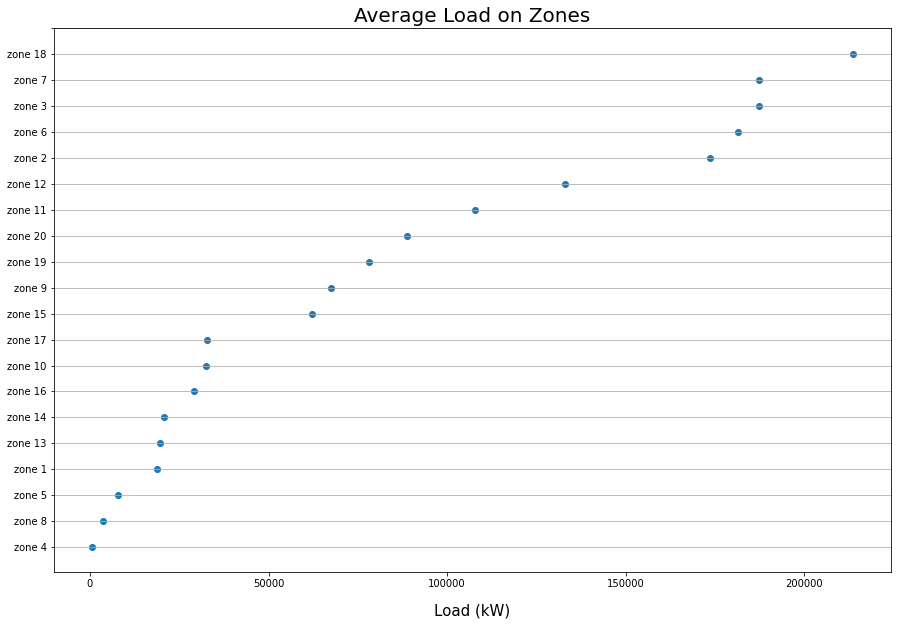

In [7]:
avg_demand = load_his.drop(columns=['year', 'month', 'day']).groupby(by="zone_id").mean().mean(axis=1).sort_values().reset_index()
avg_demand

fig, ax = plt.subplots(figsize=(15,10))
yaxis_label = ["zone " + str(z_id) for z_id in avg_demand.zone_id.values]
yaxis_label.append("")

plt.title("Average Load on Zones", fontdict={'fontsize':20})
plt.xlabel("Load (kW)", labelpad = 15, fontdict={"fontsize":15})

plt.grid(axis="y")
plt.scatter(x=avg_demand[0], y=avg_demand.index)
plt.yticks(ticks=[*range(21)], labels=yaxis_label)
plt.show()


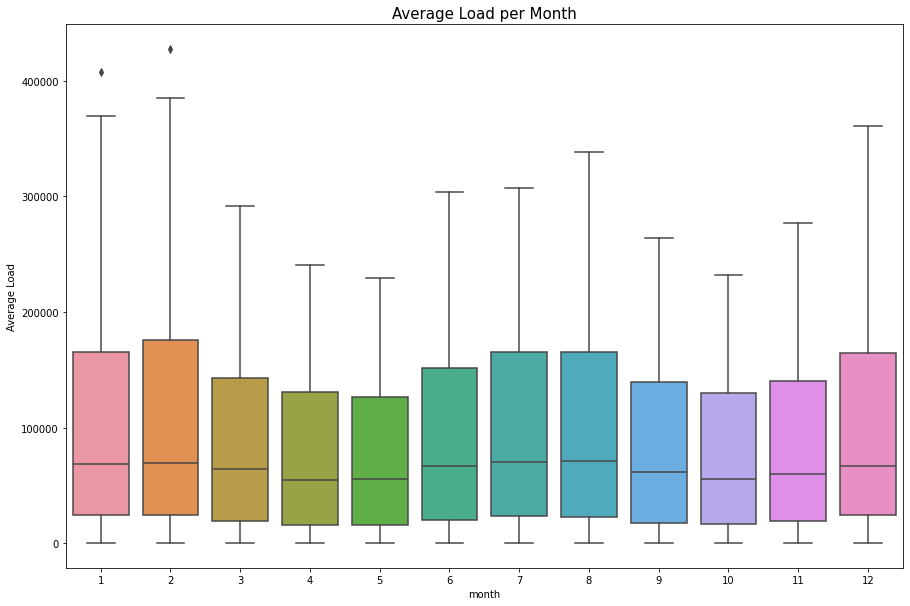

In [8]:
df = load_his.copy()

df = df.drop(columns=["zone_id", "year", "day", "month"]).mean(axis=1)
df = pd.concat([load_his['month'], df], axis=1).dropna()

fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(x=df['month'], y=df[0])
plt.title("Average Load per Month", fontsize=15)
plt.ylabel("Average Load")
plt.show()

---
# Initial Data Analysis: Temperature

In [9]:
# data check
temp_his.sample(5, random_state=rs)

,station_id,year,month,day,h1,h2,h3,h4,h5,h6,h7,h8,h9,h10,h11,h12,h13,h14,h15,h16,h17,h18,h19,h20,h21,h22,h23,h24
9226,6,2006,10,8,60,60,59,59,59,59,59.0,59.0,58.0,59.0,60.0,61.0,62.0,64.0,66.0,68.0,67.0,65.0,61.0,58.0,58.0,56.0,56.0,56.0
8279,6,2004,3,5,61,61,60,59,59,57,56.0,55.0,59.0,63.0,67.0,70.0,73.0,76.0,76.0,77.0,76.0,75.0,73.0,71.0,71.0,71.0,71.0,70.0
3734,3,2005,3,24,41,41,40,39,38,37,37.0,37.0,38.0,38.0,38.0,40.0,43.0,43.0,44.0,43.0,45.0,44.0,44.0,43.0,43.0,43.0,40.0,39.0
14390,9,2007,5,31,66,65,65,63,63,61,63.0,69.0,72.0,76.0,80.0,82.0,85.0,87.0,87.0,88.0,87.0,85.0,83.0,80.0,78.0,74.0,73.0,71.0
17710,11,2007,7,4,67,65,64,63,63,62,64.0,68.0,72.0,78.0,79.0,81.0,83.0,84.0,85.0,88.0,84.0,83.0,81.0,78.0,78.0,75.0,74.0,76.0


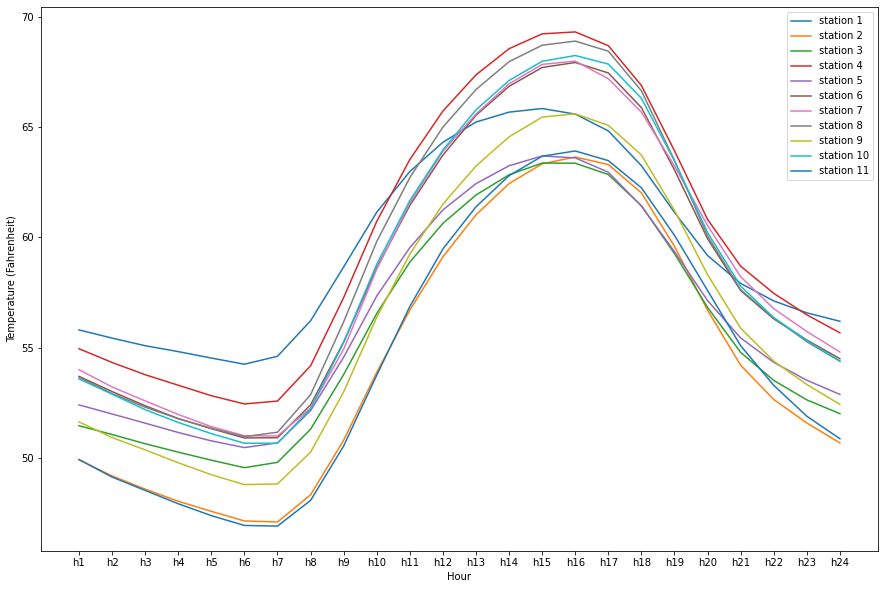

In [10]:
station_hour = temp_his.drop(columns=["year", "month", "day"]).groupby("station_id").mean()

fig, ax = plt.subplots(figsize=(15,10))
plt.plot(station_hour.T)
plt.legend(["station " + str(i) for i in range(1, 12)])
plt.xlabel("Hour")
plt.ylabel("Temperature (Fahrenheit)")
plt.show()

---
# Dataframe Preparation

In [11]:
# create a list of the column names
# simply the further steps
li_hr = ["h"+str(i) for i in range(1, 25)]

# create copy of dataframe
# convert "year", "month" and "day" (integer type) to datetime ("datetime type")
df = load_his.copy()
df["date"] = df[["year", "month", "day"]].apply(lambda x: datetime.datetime(x["year"], x["month"], x["day"]), axis=1)

te = temp_his.copy()
te["date"] = te[["year", "month", "day"]].apply(lambda x: datetime.datetime(x["year"], x["month"], x["day"]), axis=1)

# apply "stack"
# transpose "24-hour" columns to "24-row" for each day in both two datasets
df_load = pd.merge(df[["date", "zone_id"]], df[li_hr].stack().reset_index(), right_on="level_0", left_index=True)
df_temp = pd.merge(te[["date", "station_id"]], te[li_hr].stack().reset_index(), right_on="level_0", left_index=True)

# drop and rename columns
df_load.drop(columns="level_0", inplace=True)
df_load.rename(columns={0:"load"}, inplace=True)
df_temp.drop(columns="level_0", inplace=True)
df_temp.rename(columns={0:"temperature"}, inplace=True)

# merge created load and temperature dataframes
res = pd.merge(df_load, df_temp, on=["date", "level_1"], how="outer")
res

,date,zone_id,level_1,load,station_id,temperature
0,2004-01-01,1.0,h1,16853.0,1,46.0
1,2004-01-01,1.0,h1,16853.0,2,38.0
2,2004-01-01,1.0,h1,16853.0,3,44.0
3,2004-01-01,1.0,h1,16853.0,4,45.0
4,2004-01-01,1.0,h1,16853.0,5,42.0
...,...,...,...,...,...,...
8390179,2006-11-28,NaN,h24,NaN,7,49.0
8390180,2006-11-28,NaN,h24,NaN,8,46.0
8390181,2006-11-28,NaN,h24,NaN,9,46.0
8390182,2006-11-28,NaN,h24,NaN,10,48.0


In [12]:
# Prepare dataset for forecasting
# For simplicity, only record from zone 1 is extracted for forecasting

# Load the dataset
# Prepare new dataframe to store data from zone 1 and station 1
df = res[(res["zone_id"]==1) & (res["station_id"]==1)][["load", "temperature"]].copy()
df = df.reset_index().drop(columns="index")

# concatenate the rest of the 10 stations
for i in range(2, 12):
    df_2 = res[(res["zone_id"]==1) & (res["station_id"]==i)].copy()
    df_2 = df_2["temperature"].reset_index().drop(columns="index")
    df = pd.concat([df, df_2], axis=1)

# rename the columns 
df_colname = ["load"]
for x in range(1, 12):
    df_colname.append("temperature_" + str(x))
df.columns = df_colname

# result check
df

,load,temperature_1,temperature_2,temperature_3,temperature_4,temperature_5,temperature_6,temperature_7,temperature_8,temperature_9,temperature_10,temperature_11
0,16853.0,46.0,38.0,44.0,45.0,42.0,44.0,45.0,43.0,41.0,42.0,36.0
1,16450.0,46.0,36.0,42.0,43.0,42.0,43.0,44.0,44.0,39.0,43.0,32.0
2,16517.0,45.0,35.0,40.0,41.0,40.0,42.0,41.0,42.0,36.0,43.0,31.0
3,16873.0,41.0,30.0,36.0,37.0,39.0,38.0,40.0,34.0,35.0,39.0,30.0
4,17064.0,39.0,30.0,34.0,33.0,40.0,38.0,35.0,30.0,33.0,35.0,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...
38065,11559.0,74.0,65.0,76.0,72.0,74.0,70.0,73.0,71.0,72.0,70.0,65.0
38066,11081.0,74.0,64.0,76.0,72.0,74.0,70.0,72.0,71.0,72.0,70.0,64.0
38067,10798.0,74.0,64.0,75.0,72.0,73.0,70.0,71.0,71.0,69.0,70.0,64.0
38068,10876.0,74.0,64.0,75.0,72.0,72.0,70.0,71.0,70.0,69.0,70.0,64.0


<h2>Data Preprocessing</h2>

In [13]:
# Normalization

# train-test split
n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):]

# get the number of features
num_features = df.shape[1]

# manually apply standard normalization
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std

# result check
train_df

,load,temperature_1,temperature_2,temperature_3,temperature_4,temperature_5,temperature_6,temperature_7,temperature_8,temperature_9,temperature_10,temperature_11
0,-0.275470,-0.730120,-0.885251,-0.607531,-0.792425,-0.758205,-0.780207,-0.684520,-0.836733,-0.791468,-0.885432,-0.978917
1,-0.346473,-0.730120,-0.999341,-0.720097,-0.906291,-0.758205,-0.838694,-0.739514,-0.780767,-0.902080,-0.828151,-1.200769
2,-0.334669,-0.788692,-1.056386,-0.832664,-1.020158,-0.870278,-0.897181,-0.904498,-0.892699,-1.067997,-0.828151,-1.256232
3,-0.271946,-1.022978,-1.341611,-1.057797,-1.247892,-0.926314,-1.131127,-0.959492,-1.340425,-1.123303,-1.057274,-1.311695
4,-0.238295,-1.140121,-1.341611,-1.170363,-1.475625,-0.870278,-1.131127,-1.234464,-1.564288,-1.233914,-1.286397,-1.089843
...,...,...,...,...,...,...,...,...,...,...,...,...
26644,-0.284808,-1.315836,-1.170476,-1.451779,-1.532558,-1.430641,-1.189614,-1.179470,-1.508322,-1.399831,-1.343677,-1.478085
26645,0.213622,-1.374408,-1.398656,-1.508063,-1.475625,-1.542714,-1.365074,-1.289459,-1.564288,-1.455137,-1.458239,-1.533548
26646,0.987078,-1.491551,-1.512746,-1.508063,-1.646425,-1.430641,-1.423561,-1.399448,-1.620254,-1.510443,-1.515519,-1.644474
26647,1.257523,-1.491551,-1.569791,-1.508063,-1.589492,-1.486678,-1.423561,-1.344453,-1.564288,-1.510443,-1.515519,-1.644474


In [14]:
# shape check
print(train_df.shape)
print(val_df.shape)

(26649, 12)
(11421, 12)


In [15]:
# prepare names of features and target
df_colname.remove("load")
features = df_colname
target = "load"

<h2>Prepare Time-Series</h2>

In [16]:
# Create sequences
def create_sequences(data, target, seq_length):
    """
        Prepare sequence for time-series model

        data: dataframe
        target: load
        seq_length: sequence length

        e.g. 
            if seq_length = 48 (arbitrary choice of 48 hours),
            input in each training step is 48 hours * 11 stations = total 528 "features"

            if forecasting hour is 01 January 2024 , 01:00         
            input: 30 December 2023 00:00 to 01 January 2024 00:00 (48 hours)
    """

    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[features].iloc[i:i+seq_length].values)
        y.append(data[target].iloc[i+seq_length])
        
    return np.array(X), np.array(y)

In [17]:
seq_length = 48  # Using the past 48 hours to predict the next hour

# extract only the last 20000 sample to avoid memory error
df_tail = train_df.tail(20000).copy()

# apply function to create time sequence
X, y = create_sequences(df_tail, target, seq_length)

In [18]:
print(X.shape)
print(y.shape)

(19952, 48, 11)
(19952,)


---
# Define baseline model: LSTM

In [19]:
import tensorflow as tf
import random
tf.random.set_seed(rs)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

In [20]:
# Define the model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(seq_length, len(features))))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 48, 50)            12400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 32651 (127.54 KB)
Trainable params: 32651 (127.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
# Function to monitor the training 

def historyMonitor(history):
    lossMonitor = np.array(history.history['loss'])
    valLossMonitor = np.array(history.history['val_loss'])
    counts = np.arange(lossMonitor.shape[0])
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(counts,lossMonitor,'k', label='Training Data')
    ax.plot(counts,valLossMonitor,'r:', label='Validation Data')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Error')
    ax.legend()

In [22]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=10,
                                                    verbose=True,
                                                    restore_best_weights=True,
                                                    mode='min'
                                                   )

In [23]:
# check input data type
type(X)

numpy.ndarray

In [24]:
# apply lstm model
history = model.fit(X, y, epochs=100,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=[early_stopping])

Epoch 1/100
499/499 [==============================] - 19s 31ms/step - loss: 0.2388 - val_loss: 0.2157
Epoch 2/100
499/499 [==============================] - 19s 38ms/step - loss: 0.1158 - val_loss: 0.1945
Epoch 3/100
499/499 [==============================] - 22s 45ms/step - loss: 0.0956 - val_loss: 0.1885
Epoch 4/100
499/499 [==============================] - 22s 44ms/step - loss: 0.0870 - val_loss: 0.1970
Epoch 5/100
499/499 [==============================] - 17s 34ms/step - loss: 0.0815 - val_loss: 0.1344
Epoch 6/100
499/499 [==============================] - 21s 43ms/step - loss: 0.0752 - val_loss: 0.2033
Epoch 7/100
499/499 [==============================] - 15s 29ms/step - loss: 0.0714 - val_loss: 0.1356
Epoch 8/100
499/499 [==============================] - 15s 31ms/step - loss: 0.0670 - val_loss: 0.1643
Epoch 9/100
499/499 [==============================] - 15s 30ms/step - loss: 0.0645 - val_loss: 0.1485
Epoch 10/100
499/499 [==============================] - 16s 33ms/step - l

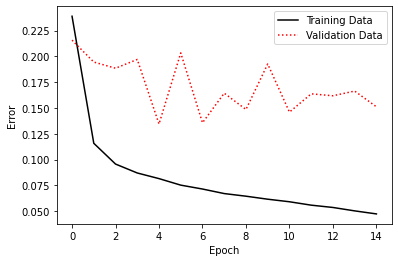

In [25]:
historyMonitor(history)

---
# Baseline model Fine-tuning

In [27]:
model_02 = Sequential()
model_02.add(LSTM(100, return_sequences=True, input_shape=(seq_length, len(features))))
model_02.add(Dropout(0.2))
model_02.add(LSTM(100, return_sequences=True))
model_02.add(BatchNormalization())
model_02.add(Dropout(0.2))
model_02.add(LSTM(100))
model_02.add(Dropout(0.2))
model_02.add(Dense(1))

model_02.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mean_squared_error'
    )

# Summary of the model
model_02.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 48, 100)           44800     
                                                                 
 dropout (Dropout)           (None, 48, 100)           0         
                                                                 
 lstm_3 (LSTM)               (None, 48, 100)           80400     
                                                                 
 batch_normalization (Batch  (None, 48, 100)           400       
 Normalization)                                                  
                                                                 
 dropout_1 (Dropout)         (None, 48, 100)           0         
                                                                 
 lstm_4 (LSTM)               (None, 100)               80400     
                                                      

In [28]:
history_02 = model_02.fit(X, y, epochs=100,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=[early_stopping])

Epoch 1/100
499/499 [==============================] - 53s 98ms/step - loss: 0.2947 - val_loss: 0.2478
Epoch 2/100
499/499 [==============================] - 51s 102ms/step - loss: 0.1585 - val_loss: 0.1681
Epoch 3/100
499/499 [==============================] - 57s 114ms/step - loss: 0.1313 - val_loss: 0.2714
Epoch 4/100
499/499 [==============================] - 61s 123ms/step - loss: 0.1175 - val_loss: 0.1636
Epoch 5/100
499/499 [==============================] - 61s 122ms/step - loss: 0.1047 - val_loss: 0.1500
Epoch 6/100
499/499 [==============================] - 60s 120ms/step - loss: 0.0982 - val_loss: 0.1895
Epoch 7/100
499/499 [==============================] - 49s 99ms/step - loss: 0.0944 - val_loss: 0.1793
Epoch 8/100
499/499 [==============================] - 50s 101ms/step - loss: 0.0873 - val_loss: 0.1444
Epoch 9/100
499/499 [==============================] - 50s 99ms/step - loss: 0.0846 - val_loss: 0.1718
Epoch 10/100
499/499 [==============================] - 57s 115ms/s

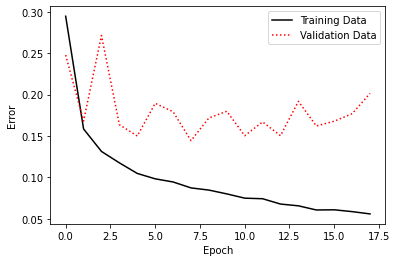

In [29]:
historyMonitor(history_02)